# Project: Investigate TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This is a report for investigating and making analysis of the movie database (TMDb) which has 10865 movies entries and 21 columns, and I will try to answer some of the following exploratory data analysis:

1. Does movies with higher vote count received a higher rating?
2. Does movies with higher vote_average has more profits?
3. What is the number of movies, total profit and average profit for each genres?
4. What is the amount of movies over the different release years?
5. How the runtime affects the budget and profit?

In [1]:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df_tmdb = pd.read_csv('tmdb-movies.csv')
df_tmdb.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
# types and number or rows and cols
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
def print_rows_cols(df):
    print('tmdb number of movies entries {} movies and {} columns'.format(df.shape[0]-1, df.shape[1]))

In [5]:
print_rows_cols(df_tmdb)

tmdb number of movies entries 10865 movies and 21 columns


In [6]:
# count null in all columns to fill it later in data cleaning
def print_na_cols():
    for col in df_tmdb.columns:
        count_na = sum(df_tmdb[col].isna())
        if count_na > 0:
            print(col, ':', count_na)

In [7]:
print_na_cols()

imdb_id : 10
cast : 76
homepage : 7930
director : 44
tagline : 2824
keywords : 1493
overview : 4
genres : 23
production_companies : 1030


In [8]:
# look for instances of missing or possibly errant data.
duplicated = df_tmdb.duplicated()
df_tmdb[duplicated]

id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline     ...       \
2090  Dwight H. Little  Survival is no game     ...        

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  

[1 rows x 21 columns]

In [9]:
# number of unique movies
df_tmdb.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

**Note**: One id is duplicated I will drop later in cleaning

In [10]:
# some describtion values to represent the data
df_tmdb.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

### data visualization

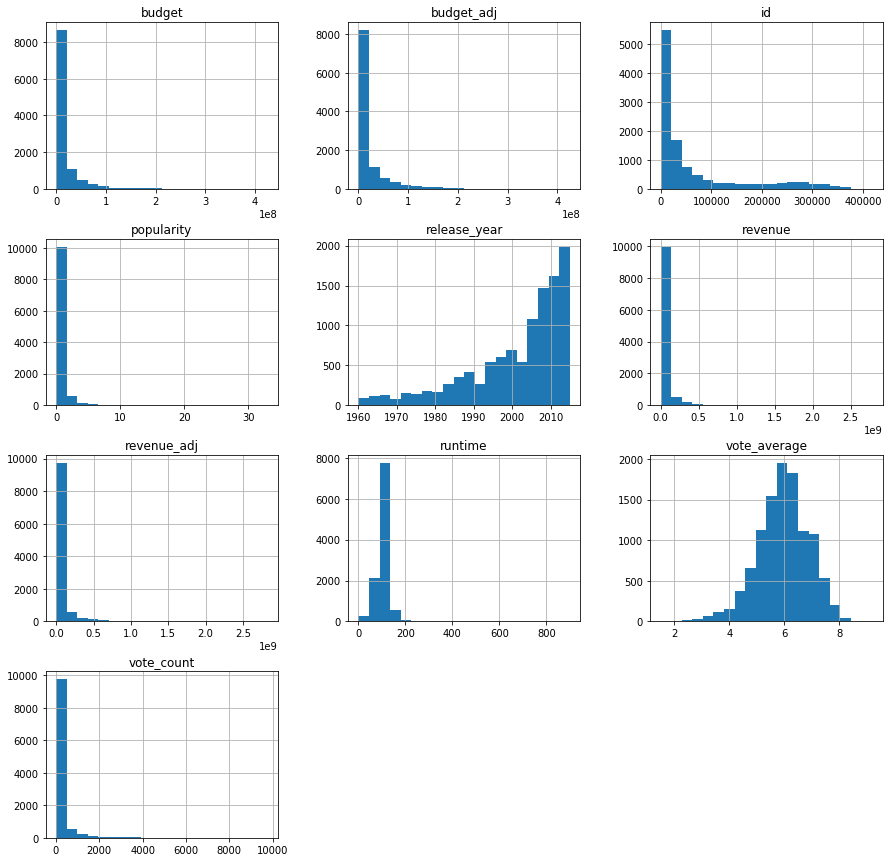

In [11]:
df_tmdb.hist(figsize=(15,15), bins=20);

In [12]:
sns.pairplot(df_tmdb, size=20);

### Data Cleaning (Replace this with more specific notes!)

#### Insights From Data Wrangling To Be Used in Data cleaning
** All columns names is lowercase and seperated by _ so I won't change it **

1- There is one duplicated row and it will be removed

2- Columns that are not unused in my analysis and will be dropped:
    - imdb_id
    - keywords 
    - homepage
    - overview 
    - release_date 
    - tagline

3- I have to handle columns that have invalid values like money or time = 0
    - budget
    - budget_adj
    - revenue
    - revenue_adj
    - runtime

4- Columns that have null rows that have to be filled or dropped:
    - imdb_id : 10 (will drop this column anyway)
    - cast : 76
    - homepage : 7930 (will drop this column anyway)
    - director : 44
    - tagline : 2824 (will drop this column anyway)
    - keywords : 1493
    - overview : 4 (will drop this column anyway)
    - genres : 23
    - production_companies : 1030

5- Columns that have values which have more than one seperated by '|' character, it can be handled for better analysis:
    - cast
    - director
    - keywords
    - genres
    - production_companies

6- insert column which represent the movie profit with values equal revenue minus budget

In [13]:
# 1. remove duplicate rows
df_tmdb.drop_duplicates(inplace=True)

In [14]:
print_rows_cols(df_tmdb) # check duplicate row removed successfully

tmdb number of movies entries 10864 movies and 21 columns


In [15]:
# 2. drop unused cols in the analysis
# I need the id as there is different movies with the same name
cols_drop_list = [
    'imdb_id',
    'keywords', 
    'homepage',
    'overview', 
    'release_date', 
    'tagline'
]
df_tmdb = df_tmdb.drop(cols_drop_list, axis=1)

In [16]:
df_tmdb.head(2)

id  popularity     budget     revenue      original_title  \
0  135397   32.985763  150000000  1513528810      Jurassic World   
1   76341   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...        6185   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08

In [17]:
# 3. handle invalid zero value
cols_zero_to_nan = ['budget', 'budget_adj', 'revenue', 'revenue_adj', 'runtime']
df_tmdb[cols_zero_to_nan] = df_tmdb[cols_zero_to_nan].replace(0, np.NAN)

In [18]:
df_tmdb.describe()

id    popularity        budget       revenue       runtime  \
count   10865.000000  10865.000000  5.169000e+03  4.849000e+03  10834.000000   
mean    66066.374413      0.646446  3.073958e+07  8.923886e+07    102.363855   
std     92134.091971      1.000231  3.890441e+07  1.620801e+08     30.948225   
min         5.000000      0.000065  1.000000e+00  2.000000e+00      2.000000   
25%     10596.000000      0.207575  6.000000e+06  7.732325e+06     90.000000   
50%     20662.000000      0.383831  1.700000e+07  3.185308e+07     99.000000   
75%     75612.000000      0.713857  4.000000e+07  9.996575e+07    112.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10865.000000  10865.000000  10865.000000  5.169000e+03  4.849000e+03  
mean     217.399632      5.975012   2001.321859  3.688907e+07  1.151009e+08  
std      575.644627      0.935138     12.813260  4.196096e+07  1.988557e+08  
min       10.000000      1.500000   1960.000000  9.210911e-01  2.370705e+00  
25%       17.000000      5.400000   1995.000000  8.102293e+06  1.046585e+07  
50%       38.000000      6.000000   2006.000000  2.271505e+07  4.395666e+07  
75%      146.000000      6.600000   2011.000000  5.008384e+07  1.316482e+08  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [19]:
print_na_cols()

budget : 5696
revenue : 6016
cast : 76
director : 44
runtime : 31
genres : 23
production_companies : 1030
budget_adj : 5696
revenue_adj : 6016


In [20]:
print_rows_cols(df_tmdb)

tmdb number of movies entries 10864 movies and 15 columns


In [21]:
# 4. drop rows with nan values
df_tmdb.dropna(subset=cols_zero_to_nan, inplace=True)

In [22]:
print_rows_cols(df_tmdb)

tmdb number of movies entries 3853 movies and 15 columns


In [23]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 15 columns):
id                      3854 non-null int64
popularity              3854 non-null float64
budget                  3854 non-null float64
revenue                 3854 non-null float64
original_title          3854 non-null object
cast                    3850 non-null object
director                3853 non-null object
runtime                 3854 non-null float64
genres                  3854 non-null object
production_companies    3808 non-null object
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
budget_adj              3854 non-null float64
revenue_adj             3854 non-null float64
dtypes: float64(7), int64(3), object(5)
memory usage: 481.8+ KB


In [24]:
df_tmdb.head()

id  popularity       budget       revenue  \
0  135397   32.985763  150000000.0  1.513529e+09   
1   76341   28.419936  150000000.0  3.784364e+08   
2  262500   13.112507  110000000.0  2.952382e+08   
3  140607   11.173104  200000000.0  2.068178e+09   
4  168259    9.335014  190000000.0  1.506249e+09   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0    124.0  Action|Adventure|Science Fiction|Thriller   
1    120.0  Action|Adventure|Science Fiction|Thriller   
2    119.0         Adventure|Science Fiction|Thriller   
3    136.0   Action|Adventure|Science Fiction|Fantasy   
4    137.0                      Action|Crime|Thriller   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot        5292   
4  Universal Pictures|Original Film|Media Rights ...        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

>Note I lost alot of data by dropping the rows which has null value but still I have enough to make my analysis I could use the mean to fill them but I choose to drop them

In [25]:
split_list = ['cast', 'director', 'genres', 'production_companies']
df_dict = {}
for col in split_list:
    df_dict[col] = df_tmdb[col].str.split('|', expand=True).rename(columns=lambda x: f"{col}_{x+1}")

#### show all new data frames

In [26]:
df_dict[split_list[0]].head(2)

cast_1               cast_2            cast_3             cast_4  \
0  Chris Pratt  Bryce Dallas Howard       Irrfan Khan  Vincent D'Onofrio   
1    Tom Hardy      Charlize Theron  Hugh Keays-Byrne     Nicholas Hoult   

          cast_5  
0  Nick Robinson  
1    Josh Helman

In [27]:
df_dict[split_list[1]].tail(2)

director_1 director_2 director_3 director_4 director_5  \
10835        Robert Wise       None       None       None       None   
10848  Richard Fleischer       None       None       None       None   

      director_6 director_7 director_8 director_9 director_10 director_11  \
10835       None       None       None       None        None        None   
10848       None       None       None       None        None        None   

      director_12  
10835        None  
10848        None

In [28]:
df_dict[split_list[2]].head(2)

genres_1   genres_2         genres_3  genres_4 genres_5
0   Action  Adventure  Science Fiction  Thriller     None
1   Action  Adventure  Science Fiction  Thriller     None

In [29]:
df_dict[split_list[3]].head(2)

production_companies_1      production_companies_2  \
0          Universal Studios        Amblin Entertainment   
1  Village Roadshow Pictures  Kennedy Miller Productions   

  production_companies_3   production_companies_4 production_companies_5  
0     Legendary Pictures  Fuji Television Network                 Dentsu  
1                   None                     None                   None

In [30]:
# drop split_list cols
df_tmdb.drop(split_list, axis=1, inplace=True)

In [31]:
# Join new cols
df_tmdb = df_tmdb.join(df_dict.values())

In [32]:
# check dataframe info
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 38 columns):
id                        3854 non-null int64
popularity                3854 non-null float64
budget                    3854 non-null float64
revenue                   3854 non-null float64
original_title            3854 non-null object
runtime                   3854 non-null float64
vote_count                3854 non-null int64
vote_average              3854 non-null float64
release_year              3854 non-null int64
budget_adj                3854 non-null float64
revenue_adj               3854 non-null float64
cast_1                    3850 non-null object
cast_2                    3846 non-null object
cast_3                    3846 non-null object
cast_4                    3838 non-null object
cast_5                    3816 non-null object
director_1                3853 non-null object
director_2                243 non-null object
director_3                34 non-null objec

> **Note** there is now a null values but it is only in splited cols it doesn't matter

In [33]:
#  6. insert profit column
df_tmdb.insert(loc=4, column='profit', value=df_tmdb['revenue'] - df_tmdb['budget'])
df_tmdb.head()

id  popularity       budget       revenue        profit  \
0  135397   32.985763  150000000.0  1.513529e+09  1.363529e+09   
1   76341   28.419936  150000000.0  3.784364e+08  2.284364e+08   
2  262500   13.112507  110000000.0  2.952382e+08  1.852382e+08   
3  140607   11.173104  200000000.0  2.068178e+09  1.868178e+09   
4  168259    9.335014  190000000.0  1.506249e+09  1.316249e+09   

                 original_title  runtime  vote_count  vote_average  \
0                Jurassic World    124.0        5562           6.5   
1            Mad Max: Fury Road    120.0        6185           7.1   
2                     Insurgent    119.0        2480           6.3   
3  Star Wars: The Force Awakens    136.0        5292           7.5   
4                     Furious 7    137.0        2947           7.3   

   release_year          ...             genres_1         genres_2  \
0          2015          ...               Action        Adventure   
1          2015          ...               Action        Adventure   
2          2015          ...            Adventure  Science Fiction   
3          2015          ...               Action        Adventure   
4          2015          ...               Action            Crime   

          genres_3  genres_4 genres_5     production_companies_1  \
0  Science Fiction  Thriller     None          Universal Studios   
1  Science Fiction  Thriller     None  Village Roadshow Pictures   
2         Thriller      None     None       Summit Entertainment   
3  Science Fiction   Fantasy     None                  Lucasfilm   
4         Thriller      None     None         Universal Pictures   

       production_companies_2   production_companies_3  \
0        Amblin Entertainment       Legendary Pictures   
1  Kennedy Miller Productions                     None   
2            Mandeville Films  Red Wagon Entertainment   
3       Truenorth Productions                Bad Robot   
4               Original Film     Media Rights Capital   

    production_companies_4 production_companies_5  
0  Fuji Television Network                 Dentsu  
1                     None                   None  
2                  NeoReel                   None  
3                     None                   None  
4                   Dentsu         One Race Films  

[5 rows x 39 columns]

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Does movies with higher vote count received a higher rating?

In [34]:
# consider movies entries only with more than 500 votes count
df_votes = df_tmdb[df_tmdb['vote_count'] > 500].loc[:, 'vote_count' : 'vote_average']
df_votes.head(2)

vote_count  vote_average
0        5562           6.5
1        6185           7.1

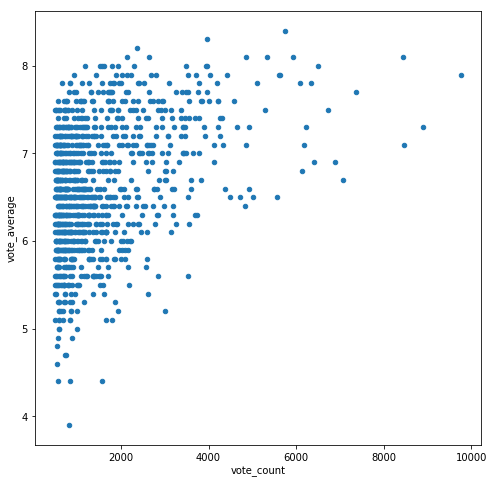

In [35]:
df_votes.plot(x='vote_count', y='vote_average', kind='scatter', figsize=(8,8));

In [36]:
df_votes.corr()

vote_count  vote_average
vote_count      1.000000      0.369244
vote_average    0.369244      1.000000

### Research Question 2: Does movies with higher vote_average has more profits?

In [37]:
# consider movies entries only with more than 500 votes count
df_rating_profits = df_tmdb[df_tmdb['vote_count'] > 500][['profit', 'vote_average']]
df_rating_profits.head(2)

profit  vote_average
0  1.363529e+09           6.5
1  2.284364e+08           7.1

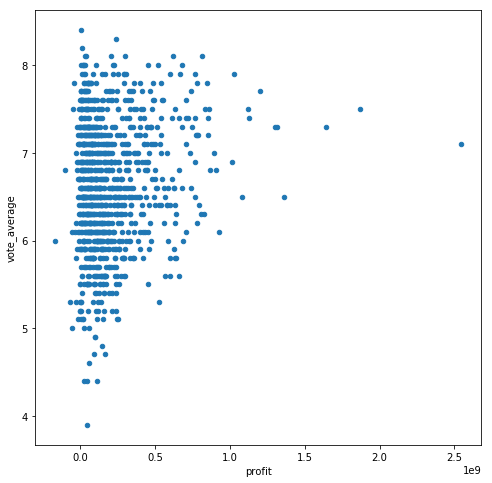

In [38]:
df_rating_profits.plot(x='profit', y='vote_average', kind='scatter', figsize=(8,8));

In [39]:
df_rating_profits.corr()

profit  vote_average
profit        1.000000      0.142661
vote_average  0.142661      1.000000

### Research Question 3:

### What is the number of movies, total profit and average profit for each genres?

In [40]:
# get different genres unique values
genres_cols = [f"genres_{i}" for i in range(1,6)]
genres_list = []
for x in genres_cols:
    genres_list += [y for y in list(df_tmdb[x].unique()) if y != None]
genres_list = list(set(genres_list))
print('Genres:', genres_list)

Genres: ['Adventure', 'Romance', 'Fantasy', 'Drama', 'History', 'Foreign', 'Comedy', 'Documentary', 'Action', 'Thriller', 'Mystery', 'Horror', 'Science Fiction', 'Animation', 'Family', 'Music', 'Western', 'TV Movie', 'Crime', 'War']


In [41]:
def get_empty_series():
    sr = pd.Series([0.0 for _ in range(len(genres_list))])
    sr.index = genres_list
    return sr

In [42]:
total_profits_genres = get_empty_series()
count_movies_genres = get_empty_series()
tmp_series = get_empty_series()
for i in range(len(genres_cols)):
    # calc total profit
    tmp_series = get_empty_series()
    tmp_series += df_tmdb.groupby(genres_cols[i])['profit'].sum()
    tmp_series.fillna(0, inplace=True)
    total_profits_genres += tmp_series 
    # calc avg profit
    tmp_series = get_empty_series()
    tmp_series += df_tmdb[genres_cols[i]].value_counts()
    tmp_series.fillna(0, inplace=True)
    count_movies_genres += tmp_series
avg_profits_genres = total_profits_genres / count_movies_genres

In [43]:
print('Total profit for each genres:')
total_profits_genres.sort_values(inplace=True)
print(total_profits_genres)

Total profit for each genres:
Foreign            2.190876e+07
TV Movie           3.700000e+07
Documentary        6.184999e+08
Western            1.798058e+09
History            5.250303e+09
War                7.589371e+09
Music              7.736432e+09
Horror             1.792805e+10
Mystery            1.925782e+10
Crime              3.327089e+10
Animation          3.621719e+10
Romance            3.900127e+10
Science Fiction    5.602414e+10
Fantasy            5.841663e+10
Family             5.978662e+10
Thriller           7.277682e+10
Drama              8.125869e+10
Comedy             8.722096e+10
Action             1.086483e+11
Adventure          1.111164e+11
dtype: float64


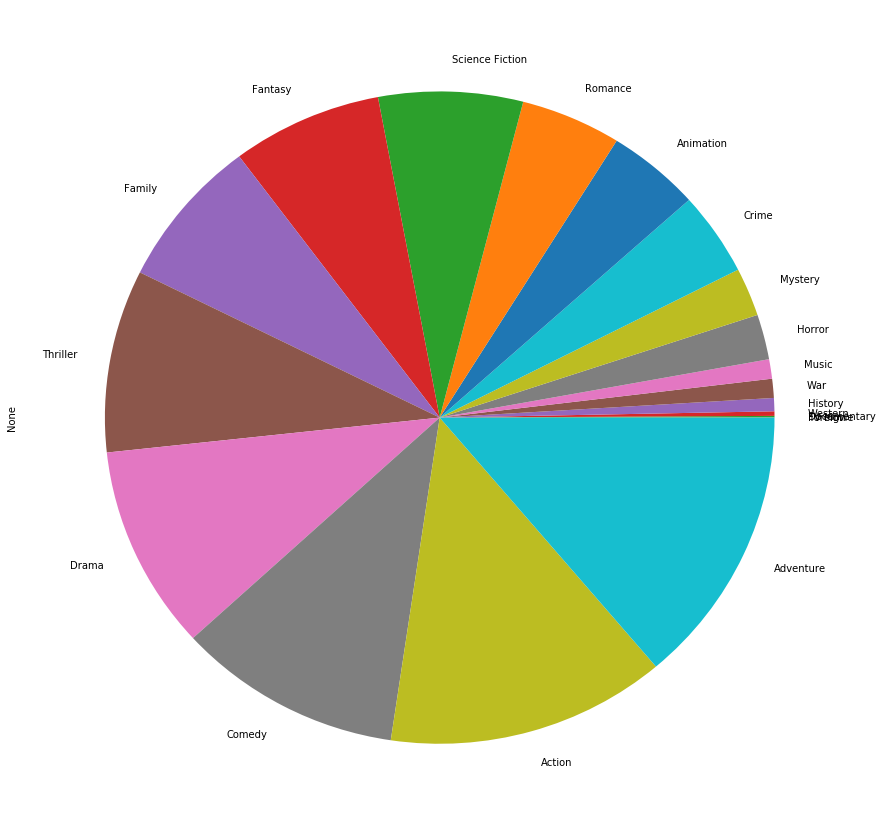

In [44]:
total_profits_genres.plot.pie(figsize=(15,15));

In [45]:
print('Number of movies from each genres:')
count_movies_genres.sort_values(inplace=True)
print(count_movies_genres)

Number of movies from each genres:
TV Movie              1.0
Foreign              13.0
Documentary          35.0
Western              52.0
War                 119.0
History             129.0
Music               136.0
Animation           201.0
Mystery             344.0
Fantasy             396.0
Family              425.0
Horror              463.0
Science Fiction     519.0
Crime               651.0
Romance             667.0
Adventure           749.0
Action             1085.0
Thriller           1204.0
Comedy             1358.0
Drama              1756.0
dtype: float64


In [46]:
print(count_movies_genres.index)

Index(['TV Movie', 'Foreign', 'Documentary', 'Western', 'War', 'History',
       'Music', 'Animation', 'Mystery', 'Fantasy', 'Family', 'Horror',
       'Science Fiction', 'Crime', 'Romance', 'Adventure', 'Action',
       'Thriller', 'Comedy', 'Drama'],
      dtype='object')


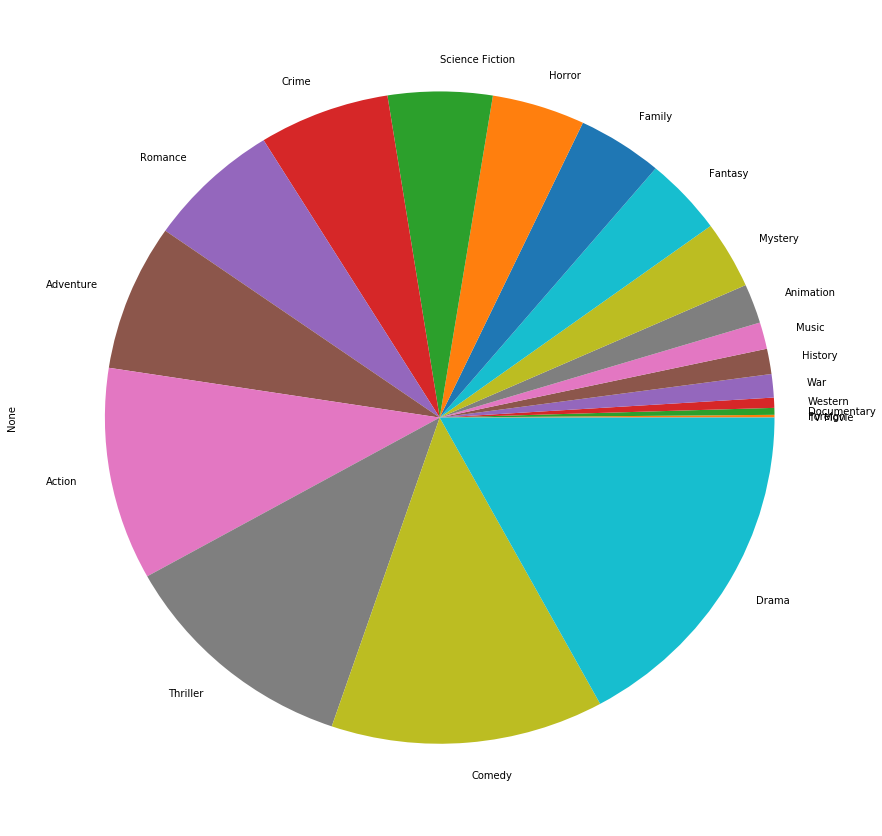

In [47]:
count_movies_genres.plot.pie(figsize=(15,15));

In [48]:
print('Avg profit for each genres:')
avg_profits_genres.sort_values(inplace=True)
print(avg_profits_genres)

Avg profit for each genres:
Foreign            1.685289e+06
Documentary        1.767142e+07
Western            3.457804e+07
TV Movie           3.700000e+07
Horror             3.872150e+07
History            4.070002e+07
Drama              4.627488e+07
Crime              5.110735e+07
Mystery            5.598205e+07
Music              5.688553e+07
Romance            5.847267e+07
Thriller           6.044586e+07
War                6.377623e+07
Comedy             6.422751e+07
Action             1.001367e+08
Science Fiction    1.079463e+08
Family             1.406744e+08
Fantasy            1.475167e+08
Adventure          1.483529e+08
Animation          1.801850e+08
dtype: float64


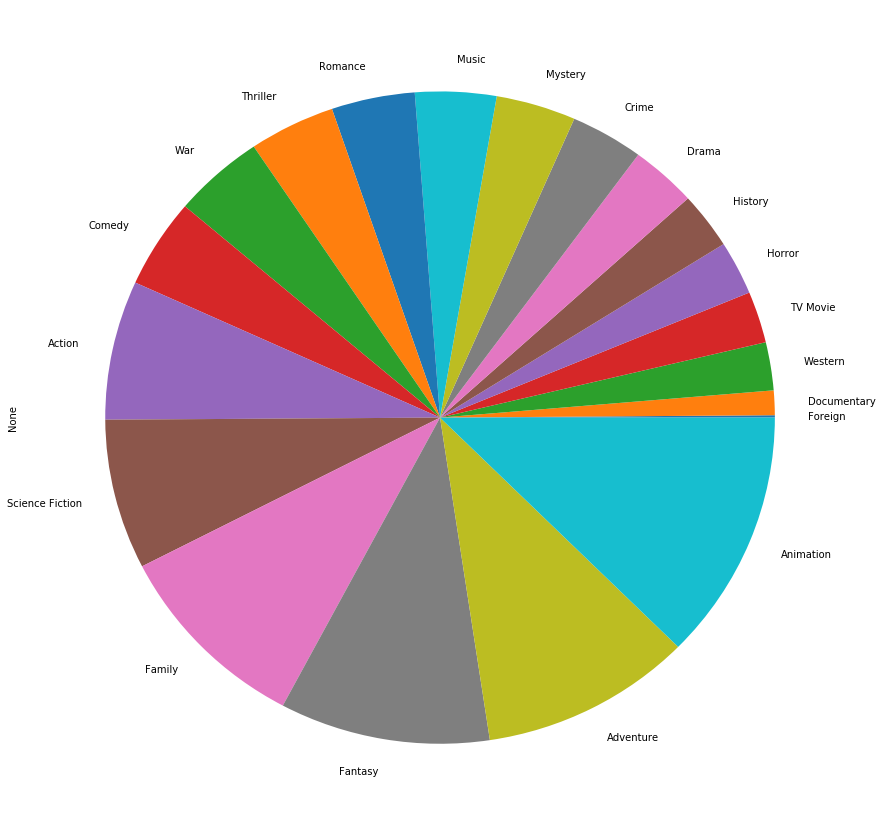

In [49]:
avg_profits_genres.plot.pie(figsize=(15,15));

### Research Question 4 (what is the amount of movies over the different release years?)

In [50]:
df_year = df_tmdb[['release_year']]
df_year_movies = df_year['release_year'].value_counts()
df_year_movies = df_year_movies.to_frame().sort_values('release_year').reset_index()
df_year_movies.columns = ['release_year', 'movies_count']
df_year_movies

release_year  movies_count
0           1969             4
1           1965             5
2           1960             5
3           1966             5
4           1963             6
5           1962             7
6           1964             7
7           1972             8
8           1968             9
9           1975             9
10          1961            10
11          1970            11
12          1973            12
13          1971            13
14          1967            13
15          1974            13
16          1976            15
17          1979            16
18          1978            17
19          1977            19
20          1980            23
21          1982            26
22          1981            30
23          1983            31
24          1985            41
25          1984            42
26          1987            46
27          1986            48
28          1991            50
29          1989            51
30          1992            53
31          1990            53
32          1988            57
33          1994            62
34          1993            72
35          1995            81
36          1996            86
37          1997            90
38          1998            92
39          2000           106
40          1999           116
41          2001           121
42          2003           121
43          2002           127
44          2004           147
45          2012           158
46          2015           160
47          2005           163
48          2007           165
49          2014           165
50          2008           167
51          2006           169
52          2009           174
53          2010           178
54          2013           180
55          2011           199

In [51]:
df_year_movies.corr()

release_year  movies_count
release_year      1.000000      0.944817
movies_count      0.944817      1.000000

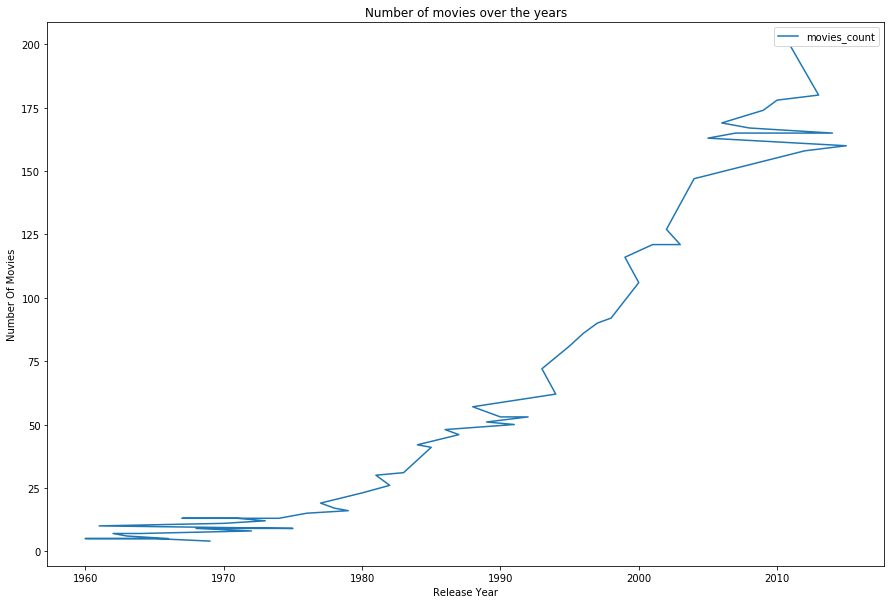

In [52]:
df_year_movies.plot(
    x='release_year', 
    y='movies_count', 
    kind='line', 
    figsize=(15,10), 
    title="Number of movies over the years"
)
plt.xlabel('Release Year')
plt.ylabel('Number Of Movies');

### Research Question 5 (How the runtime affects the budget and profit?)

In [53]:
# consider movies entries only with more than 500 votes count
df_rating_profits = df_tmdb[['profit', 'budget', 'runtime']]
df_rating_profits.head(2)

profit       budget  runtime
0  1.363529e+09  150000000.0    124.0
1  2.284364e+08  150000000.0    120.0

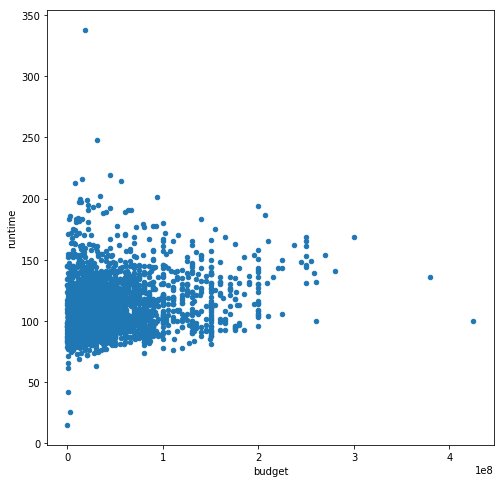

In [54]:
df_rating_profits[['budget', 'runtime']].plot(x='budget', y='runtime', kind='scatter', figsize=(8,8));

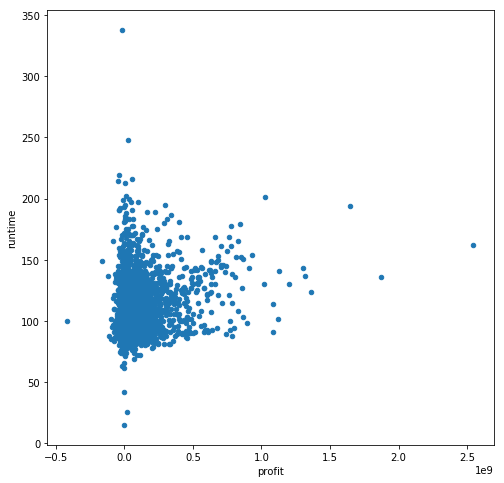

In [55]:
df_rating_profits[['profit', 'runtime']].plot(x='profit', y='runtime', kind='scatter', figsize=(8,8));

In [56]:
df_rating_profits.corr()

profit    budget   runtime
profit   1.000000  0.526818  0.220238
budget   0.526818  1.000000  0.260977
runtime  0.220238  0.260977  1.000000

<a id='conclusions'></a>
## Conclusions

> **Answer1:** The corralation does not indicate that higher the vote count the higher vote average.

> **Answer2:** The corralation does not indicate that higher the vote average leads to higher profit (very low correclation = 0.1).

> **Answer3:** I calculated the number of movies for each genres and also the total profit and average profit for each genres and it turns out the Foreign genre is the lowest average profit and Animation is the highest

> **Answer4:** The Number of movies increased over the years from 1960 to 2015 as release year and number of movies are highly correlated (0.9).

> **Answer5:** The corralation does not indicate that higher runtime of the movie the higher the budget or profit the correlation is low (0.2)

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0